# 11. Data import

In [2]:
library(tidyverse)

In [24]:
setwd('/Users/andreafava/OneDrive - Johns Hopkins University/Projects/StatsBookClub')
library(rlang)
library("IRdisplay")

In [4]:
h<-function(x) {x[1:5,1:(min(ncol(x),5))]}

## 11.1 Read tables
read_csv() reads comma delimited files, read_csv2() reads semicolon separated files (common in countries where , is used as the decimal place), read_tsv() reads tab delimited files, and read_delim() reads in files with any delimiter.

read_fwf() reads fixed width files. You can specify fields either by their widths with fwf_widths() or their position with fwf_positions(). read_table() reads a common variation of fixed width files where columns are separated by white space.

### CSV and delimited files
R base has a read.csv command while tidyverse has read_csv.

#### R base

In [ ]:
tab1 <- read.csv('small_table.csv')

In [ ]:
class(tab1)

In [ ]:
h(tab1)

#### tidyverse

In [ ]:
tab2 <- read_csv('small_table.csv') 

In [ ]:
class(tab2)

In [ ]:
h(tab2)

In [ ]:
## Skip
tab3 <- read_csv('small_table_skip.csv')
h(tab3)

In [ ]:
tab3 <- read_csv('small_table_skip.csv', skip = 1) 
#tab3 <- read_csv('small_table_skip.csv', skip = 1, na = -1)
h(tab3)

In [ ]:
# Large files
library(data.table)
system.time(
  #UMI_table <- fread("gunzip -c dataset_UMI_seurat.tsv.gz")
  UMI_table <- read_delim("dataset_UMI_seurat.tsv", delim = '\t') #68 sec
)

h(UMI_table)
dim(UMI_table)
class(UMI_table)

### Excel
library(readxl)
read_excel()     for both xls and xlsx files (replacing read_xls and read_xlsx)

## 11.2 Parsing
Parsing involves a set of function parse_* that take a character vector and return a more specialised vector like a logical, integer, or date.

In [ ]:
str(parse_integer(c("1", "2", "3")))

In [ ]:
str(parse_integer(c("1", "2", "3")))

In [ ]:
str(parse_date(c("2010-01-01", "1979-10-14")))

Define NAs

In [ ]:
parse_integer(c("1", "231", ".", "456"), na = ".")

It may identify errors

In [ ]:
x <- parse_integer(c("123", "345", "abc", "123.45"))

In [ ]:
x

If there are many parsing failures, you’ll need to use problems() to get the complete set. This returns a tibble, which you can then manipulate with dplyr.

In [ ]:
problems(x)

It can be particularly useful for numbers

In [ ]:
parse_number("$100")

In [ ]:
parse_number("20%")

In [ ]:
parse_number("It cost $123.45")

Especially with foreign formatting

In [ ]:
parse_number("$123,456,789")

In [ ]:
parse_number("123.456.789", locale = locale(grouping_mark = "."))

In [ ]:
parse_number("123'456'789", locale = locale(grouping_mark = "'")) #apparently used in Switzerland

..and with dates/time

In [ ]:
parse_datetime("2010-10-01T2010")

And it can guess the class

In [ ]:
guess_parser("2010-10-01")
guess_parser("15:01")
guess_parser(c("TRUE", "FALSE"))

# 12. Tidy datasets

There are three interrelated rules which make a dataset tidy:

    1) Each variable must have its own column

    2) Each observation must have its own row.

    3) Each value must have its own cell.

In [6]:
library(tidyverse)
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [7]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


Why ensure that your data is tidy? There are two main advantages:

    1) There’s a general advantage to picking one consistent way of storing data. If you have a consistent data structure, it’s easier to learn the tools that work with it because they have an underlying uniformity.

    2) There’s a specific advantage to placing variables in columns because it allows R’s vectorised nature to shine. As you learned in mutate and summary functions, most built-in R functions work with vectors of values. That makes transforming tidy data feel particularly natural.

In [10]:
# Compute rate per 10,000
table1 %>% 
  mutate(rate = cases / population * 10000)

country,year,cases,population,rate
<chr>,<int>,<int>,<int>,<dbl>
Afghanistan,1999,745,19987071,0.372741
Afghanistan,2000,2666,20595360,1.294466
Brazil,1999,37737,172006362,2.193930
Brazil,2000,80488,174504898,4.612363
China,1999,212258,1272915272,1.667495
China,2000,213766,1280428583,1.669488


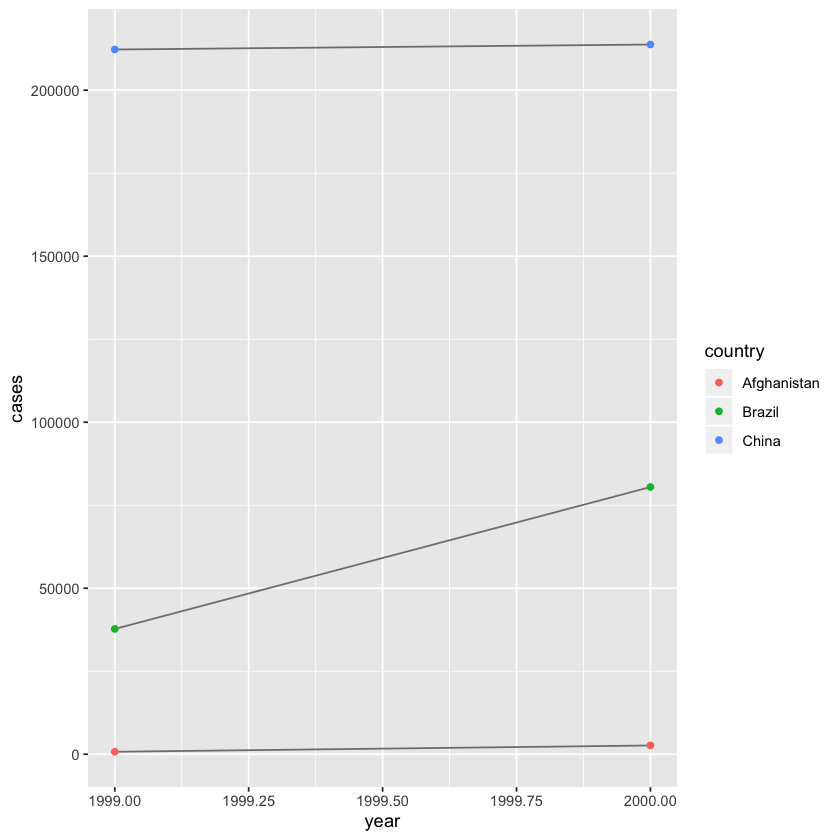

In [19]:
library(ggplot2)
ggplot(table1, aes(year, cases)) + 
  geom_line(aes(group = country), colour = "grey50") + 
  geom_point(aes(colour = country))

## Gather and spread

A common problem is a dataset where some of the column names are not names of variables, but values of a variable. Take table4a: the column names 1999 and 2000 represent values of the year variable, and each row represents two observations, not one.

In [21]:
table4a

country,1999,2000
<chr>,<int>,<int>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


To tidy a dataset like this, we need to gather those columns into a new pair of variables. To describe that operation we need three parameters:

    - The set of columns that represent values, not variables. In this example, those are the columns 1999 and 2000.

    - The name of the variable whose values form the column names. I call that the key, and here it is year.

    - The name of the variable whose values are spread over the cells. I call that value, and here it’s the number of cases.

Together those parameters generate the call to gather():

In [23]:
table4a %>% 
  gather(`1999`, `2000`, key = "year", value = "cases")

country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


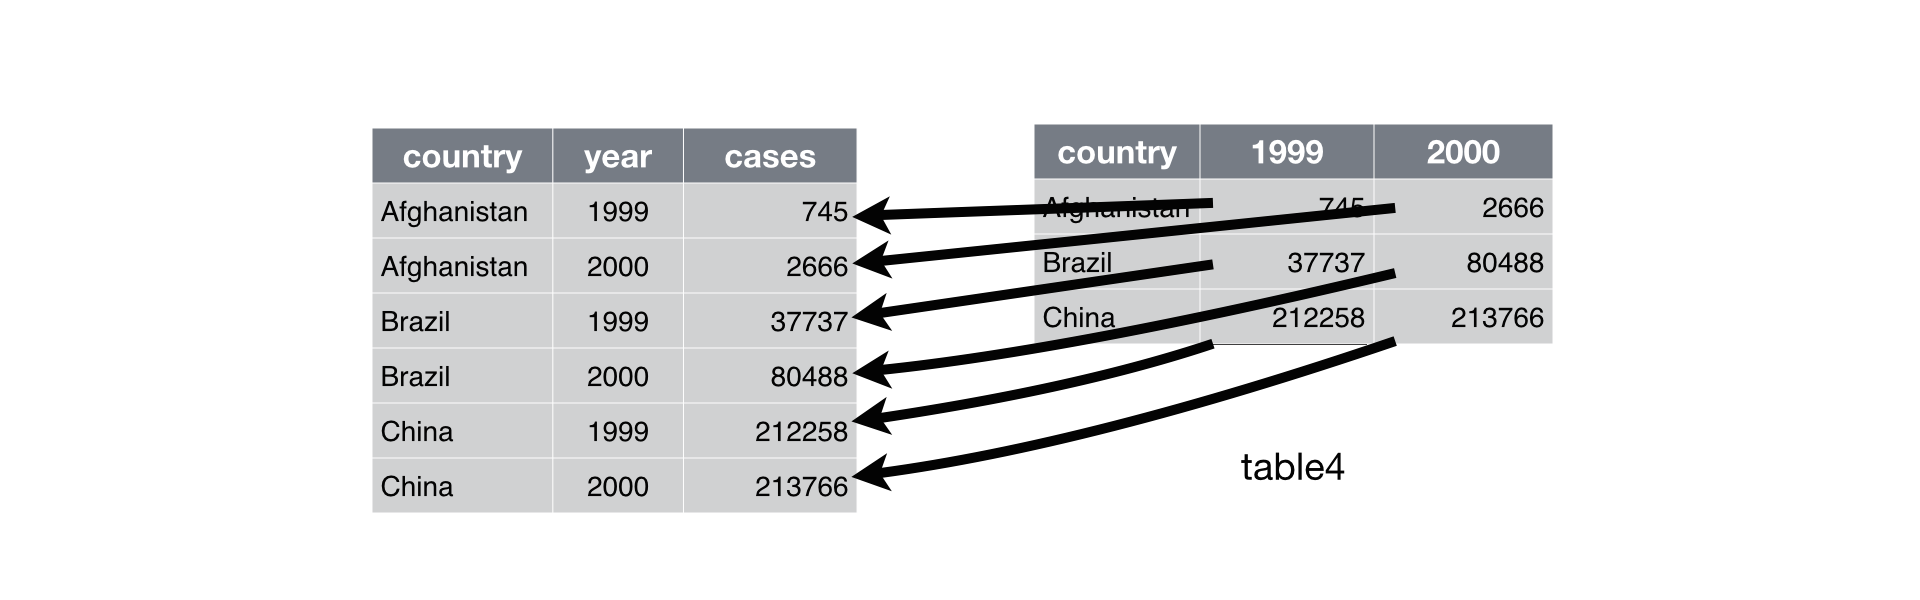

In [36]:
display_png(file="tidy-9.png")

### Spread

take table2: an observation is a country in a year, but each observation is spread across two rows.

In [39]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [38]:
table2 %>%
    spread(key = type, value = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separate and unite

separate() pulls apart one column into multiple columns, by splitting wherever a separator character appears. Take table3:

In [41]:
table3

country,year,rate
<chr>,<int>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


The rate column contains both cases and population variables, and we need to split it into two variables. separate() takes the name of the column to separate, and the names of the columns to separate into, as shown in Figure 12.4 and the code below.

In [42]:
table3 %>% 
  separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [44]:
table3 %>% 
  separate(rate, into = c("cases", "population"), sep = "/")

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Unite

unite() is the inverse of separate(): it combines multiple columns into a single column. You’ll need it much less frequently than separate(), but it’s still a useful tool to have in your back pocket.

We can use unite() to rejoin the century and year columns that we created in the last example. That data is saved as tidyr::table5. unite() takes a data frame, the name of the new variable to create, and a set of columns to combine, again specified in dplyr::select() style:

In [46]:
table5

country,century,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [48]:
table5 %>% 
  unite(new, century, year, sep='')

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


## Fill

In [49]:
treatment <- tribble(
  ~ person,           ~ treatment, ~response,
  "Derrick Whitmore", 1,           7,
  NA,                 2,           10,
  NA,                 3,           9,
  "Katherine Burke",  1,           4
)

In [51]:
treatment %>% fill(person)

person,treatment,response
<chr>,<dbl>,<dbl>
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4


# 13. Relational data

Multiple tables of data are called relational data because it is the relations, not just the individual datasets, that are important.

Relations are always defined between a pair of tables.

In [52]:
library(tidyverse)
library(nycflights13)

In [53]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [54]:
airlines %>% head

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.


In [56]:
airports %>% head

faa,name,lat,lon,alt,tz,dst,tzone
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York


In [57]:
airports %>% filter(faa %in% c('LGA','EWR','JFK'))

faa,name,lat,lon,alt,tz,dst,tzone
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
EWR,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
JFK,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
LGA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York


## Keys
Each table has a 
    - PRIMARY key: a unique identifier for the items in that table  (tailnum in planes)
    - FOREIGN key: uniquely identifies an observation in another table (tailnum in flights)

In [58]:
flights2 <- flights %>% 
  select(year:day, hour, origin, dest, tailnum, carrier)
flights2 %>% head

year,month,day,hour,origin,dest,tailnum,carrier
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA
2013,1,1,5,LGA,IAH,N24211,UA
2013,1,1,5,JFK,MIA,N619AA,AA
2013,1,1,5,JFK,BQN,N804JB,B6
2013,1,1,6,LGA,ATL,N668DN,DL
2013,1,1,5,EWR,ORD,N39463,UA


Imagine you want to add the full airline name to the flights2 data. You can combine the airlines and flights2 data frames with left_join():

In [60]:
flights2 %>% 
  left_join(airlines, by = "carrier") %>% 
    head

year,month,day,hour,origin,dest,tailnum,carrier,name
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,United Air Lines Inc.
2013,1,1,5,LGA,IAH,N24211,UA,United Air Lines Inc.
2013,1,1,5,JFK,MIA,N619AA,AA,American Airlines Inc.
2013,1,1,5,JFK,BQN,N804JB,B6,JetBlue Airways
2013,1,1,6,LGA,ATL,N668DN,DL,Delta Air Lines Inc.
2013,1,1,5,EWR,ORD,N39463,UA,United Air Lines Inc.


The result of joining airlines to flights2 is an additional variable: name. This is why I call this type of join a mutating join. In this case, you could have got to the same place using mutate() and R’s base subsetting:

In [ ]:
flights2 %>%
  mutate(name = airlines$name[match(carrier, airlines$carrier)]) %>%
    head

## Joins (a better way of merging)

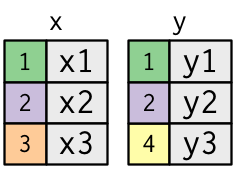

In [62]:
display_png(file="join-setup.png")

In [67]:
x <- tribble(
  ~key, ~val_x,
     1, "x1",
     2, "x2",
     3, "x3"
)
y <- tribble(
  ~key, ~val_y,
     1, "y1",
     2, "y2",
     4, "y3"
)


In [68]:
x

key,val_x
<dbl>,<chr>
1,x1
2,x2
3,x3


In [69]:
y

key,val_y
<dbl>,<chr>
1,y1
2,y2
4,y3


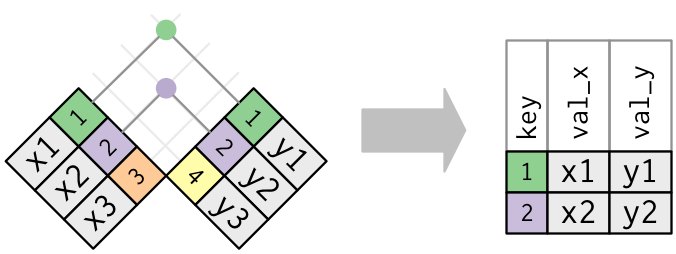

In [71]:
display_png(file="join-inner.png")

In [72]:
inner_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2


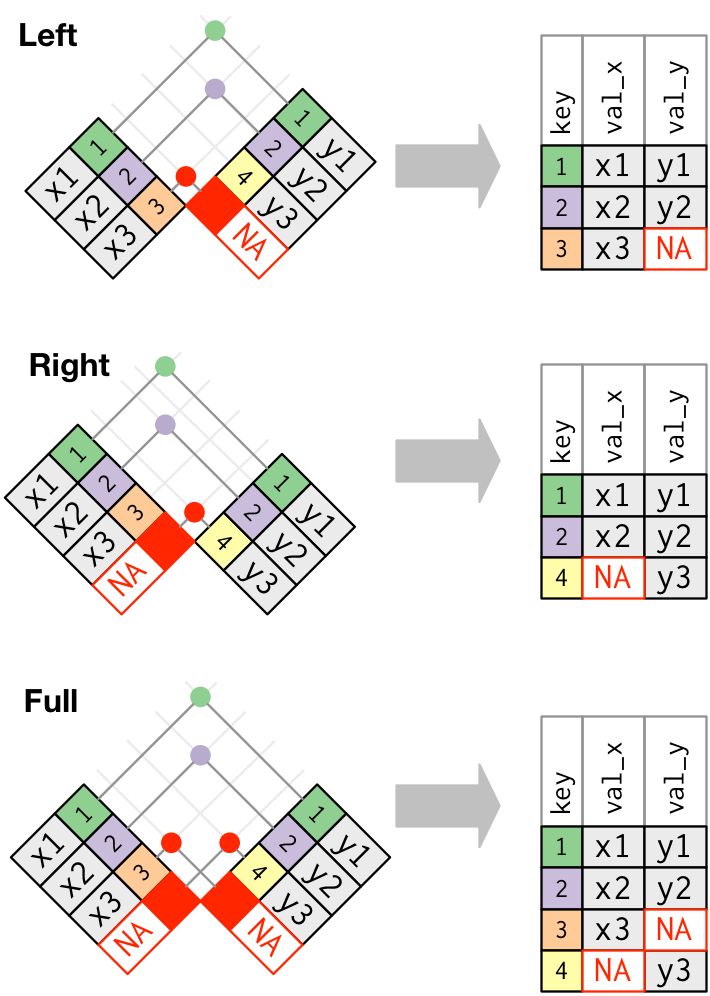

In [74]:
display_png(file="join-outer.png")

In [75]:
left_join(x, y, by = "key")

key,val_x,val_y
<dbl>,<chr>,<chr>
1,x1,y1
2,x2,y2
3,x3,NA


#### Airport dataset join example (Defining the key columns)

So far, the pairs of tables have always been joined by a single variable, and that variable has the same name in both tables. That constraint was encoded by by = "key". You can use other values for by to connect the tables in other ways:

The default, by = NULL, uses all variables that appear in both tables, the so called natural join. For example, the flights and weather tables match on their common variables: year, month, day, hour and origin.

In [78]:
flights2 %>% head

year,month,day,hour,origin,dest,tailnum,carrier
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA
2013,1,1,5,LGA,IAH,N24211,UA
2013,1,1,5,JFK,MIA,N619AA,AA
2013,1,1,5,JFK,BQN,N804JB,B6
2013,1,1,6,LGA,ATL,N668DN,DL
2013,1,1,5,EWR,ORD,N39463,UA


In [83]:
flights2 %>% 
  left_join(weather) %>% 
    head

Joining, by = c("year", "month", "day", "hour", "origin")


year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250,14.96014,21.86482,0,1011.4,10,2013-01-01 05:00:00
2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260,14.96014,NA,0,1012.1,10,2013-01-01 05:00:00
2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260,16.11092,23.01560,0,1011.7,10,2013-01-01 06:00:00
2013,1,1,5,EWR,ORD,N39463,UA,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00


A character vector, by = "x". This is like a natural join, but uses only some of the common variables. For example, flights and planes have year variables, but they mean different things so we only want to join by tailnum.

In [84]:
flights2 %>% 
  left_join(planes, by = "tailnum") %>%
    head

year.x,month,day,hour,origin,dest,tailnum,carrier,year.y,type,manufacturer,model,engines,seats,speed,engine
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,1999,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,LGA,IAH,N24211,UA,1998,Fixed wing multi engine,BOEING,737-824,2,149,NA,Turbo-fan
2013,1,1,5,JFK,MIA,N619AA,AA,1990,Fixed wing multi engine,BOEING,757-223,2,178,NA,Turbo-fan
2013,1,1,5,JFK,BQN,N804JB,B6,2012,Fixed wing multi engine,AIRBUS,A320-232,2,200,NA,Turbo-fan
2013,1,1,6,LGA,ATL,N668DN,DL,1991,Fixed wing multi engine,BOEING,757-232,2,178,NA,Turbo-fan
2013,1,1,5,EWR,ORD,N39463,UA,2012,Fixed wing multi engine,BOEING,737-924ER,2,191,NA,Turbo-fan


A named character vector: by = c("a" = "b"). This will match variable a in table x to variable b in table y. The variables from x will be used in the output.

In [80]:
flights2 %>% 
  left_join(airports, c("origin" = "faa")) %>%
      head

year,month,day,hour,origin,dest,tailnum,carrier,name,lat,lon,alt,tz,dst,tzone
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
2013,1,1,5,EWR,IAH,N14228,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
2013,1,1,5,LGA,IAH,N24211,UA,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,JFK,MIA,N619AA,AA,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,5,JFK,BQN,N804JB,B6,John F Kennedy Intl,40.63975,-73.77893,13,-5,A,America/New_York
2013,1,1,6,LGA,ATL,N668DN,DL,La Guardia,40.77725,-73.87261,22,-5,A,America/New_York
2013,1,1,5,EWR,ORD,N39463,UA,Newark Liberty Intl,40.69250,-74.16867,18,-5,A,America/New_York
